# Sonata Lightning Tools: QueryPlan Similarity Analyzer

### Takes the query plan data from the Reports and provides similarity matrix. Helps in developers in analyzing the reports and reuse the aspects of reports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
%run lightning_helper.ipynb

### Document metadata with Queries

In [2]:
# Load the data from Excel file
excel_file_path = get_full_file_path('input', 'document-query-plan.csv')
# excel_file_path = 'test_data.csv'
df = pd.read_csv(excel_file_path)

## Create cosine similarity matrix of all the query plans

In [3]:
# Convert queryplan column to bag-of-words vectors
vectorizer = CountVectorizer()
queryplan_vectors = vectorizer.fit_transform(df["QueryPlan"])

# Calculate cosine similarity between queryplan vectors
cosine_sim = cosine_similarity(queryplan_vectors)

In [4]:
# print(cosine_sim)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Similarity heatmap for all the reports based on QueryPlans

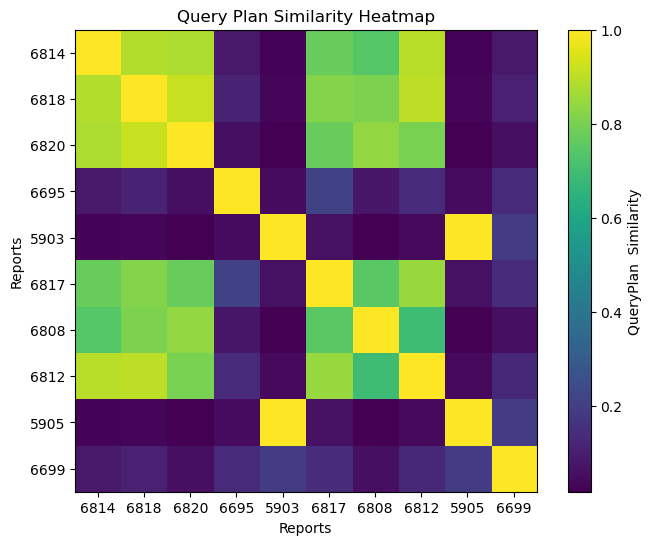

In [6]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cosine_sim, cmap='viridis', interpolation='nearest')
plt.colorbar(label='QueryPlan  Similarity')
plt.title('Query Plan Similarity Heatmap')
plt.xlabel('Reports')
plt.ylabel('Reports')
plt.xticks(range(len(cosine_sim)), df['DocId'])
plt.yticks(range(len(cosine_sim)),  df['DocId'])
plt.show()

In [7]:
# Index of the specific record you want to match
row_index_of_report = 4  # Replace this with the desired index

# Get matching rows from the DataFrame
matching_row = df.loc[row_index_of_report]

matching_row

DocId                                                       5903
DpId                                                         DP0
DpName                                                   Query 1
DsId                                                        5636
QueryPlan      {"queryplan":{"@custom":"false","@editable":"t...
TableCount                                                     3
ColumnCount                                                    8
Complexity                                                  True
TableList      Article_Color_Lookup;Article_Lookup_Criteria;S...
ColumnList     Family_name;Category;Article_id;Article_label;...
Name: 4, dtype: object

In [8]:
# Threshold for similarity
threshold = 0.8

In [9]:
# Get the row of the specific record from the similarity matrix
specific_record_similarity = cosine_sim[row_index_of_report]

# Find rows with similarity above the threshold
matching_indices = np.where(specific_record_similarity > threshold)[0]

# Print matching indices
print("Matching indices:", matching_indices)

# Get matching rows from the DataFrame
matching_rows = df.loc[matching_indices]

# Print matching rows
print("Matching rows:")
print(matching_rows)

Matching indices: [4 8]
Matching rows:
   DocId DpId   DpName  DsId  \
4   5903  DP0  Query 1  5636   
8   5905  DP0  Query 1  5636   

                                           QueryPlan  TableCount  ColumnCount  \
4  {"queryplan":{"@custom":"false","@editable":"t...           3            8   
8  {"queryplan":{"@custom":"false","@editable":"t...           3            8   

   Complexity                                          TableList  \
4        True  Article_Color_Lookup;Article_Lookup_Criteria;S...   
8        True  Article_Color_Lookup;Article_Lookup_Criteria;S...   

                                          ColumnList  
4  Family_name;Category;Article_id;Article_label;...  
8  Family_name;Category;Article_id;Article_label;...  
